IMAGE CLASSIFICATION MODEL

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 46ms/step - accuracy: 0.8916 - loss: 0.3338 - val_accuracy: 0.9817 - val_loss: 0.0570
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 48ms/step - accuracy: 0.9827 - loss: 0.0544 - val_accuracy: 0.9840 - val_loss: 0.0483
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 103s 55ms/step - accuracy: 0.9895 - loss: 0.0341 - val_accuracy: 0.9890 - val_loss: 0.0357
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 118s 63ms/step - accuracy: 0.9921 - loss: 0.0255 - val_accuracy: 0.9905 - val_loss: 0.0288
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9876 - loss: 0.0367

Test accuracy:0.9905,loss:0.0288


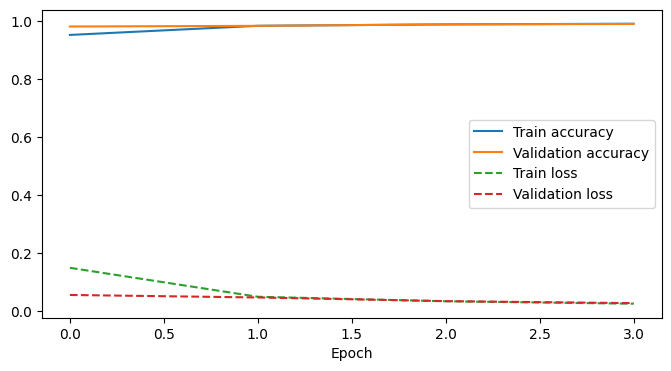

In [2]:
#import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
import matplotlib.pyplot as plt
# load MNIST images
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#normalizing pixel values to [0,1] for better training
x_train=x_train[...,None]/255.0 
x_test=x_test[...,None]/255.0 
# cnn model building
model = tf.keras.Sequential([
    layers.Conv2D(32,3,activation='relu',input_shape=(28,28,1)),  #first convolution to detect basic features
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation='relu'),  #second convolution to detect complex features
    layers.MaxPooling2D(),
    layers.Flatten(),  #convers multi dimensional to 1d vector 
    layers.Dense(64,activation='relu'),  #dense hidden layer
    layers.Dense(10,activation='softmax'),  #output layer, probability distribution over 10 digits
])
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# train the model and save its history
history = model.fit(x_train,y_train,
                    validation_data=(x_test,y_test),
                    epochs=4,  #no of passes over dataset
                    batch_size=32)
# model evaluation
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"\nTest accuracy:{test_acc:.4f},loss:{test_loss:.4f}")
# visualization
plt.figure(figsize=(8,4))
#accuracy plot
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
#loss plot
plt.plot(history.history['loss'],label='Train loss',linestyle='--')
plt.plot(history.history['val_loss'],label='Validation loss',linestyle='--')
plt.xlabel('Epoch')
plt.legend()
plt.show()
